# MACHINE LEARNING PROJECT: MOBILE PHONE PRICE PREDICTION

# Data Splitting

In [1]:
import pandas as pd
import numpy as np
import time

In [2]:
data=pd.read_csv("train.csv")

In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Here is the attributes of our dataset:
       
       battery_power: Total energy a battery can store in one time measured in mAh
       blue: Has bluetooth or not
       clock_speed: speed at which microprocessor executes instructions
       dual_sim: Has dual sim support or not
       fc: Front Camera mega pixels
       four_g: Has 4G or not
       int_memory: Internal Memory in Gigabytes
       m_dep: Mobile Depth in cm
       mobile_wt: Weight of mobile phone
       n_cores: Number of cores of processor
       pc: Primary Camera mega pixels
       px_height: Pixel Resolution Height
       px_width: Pixel Resolution Width
       ram: Random Access Memory in Megabytes
       sc_h: Screen Height of mobile in cm
       sc_w: Screen Width of mobile in cm
       talk_time: longest time that a single battery charge will last when you are
       three_g: Has 3G or not
       touch_screen: Has touch screen or not
       wifi: Has wifi or not
       price_range: This is the target variable with value of 0 (low cost), 1 (medium cost), 2 (high cost) and 3 (very high cost)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

We can see there are no null values in this data-set.

In [6]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000



We can find that these attributes are dummy variables:blue,dual_sim,four_g,three_g,touch_screen,wifi.
And we try to scaling values of attributes to the same level [0,1] for data normalization.


In [7]:
data_norm = (data - data.min()) / (data.max() - data.min())
data_norm.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.492664,0.4950,0.408900,0.509500,0.226816,0.521500,0.484621,0.446389,0.502075,0.502929,...,0.329137,0.501679,0.499255,0.521893,0.320389,0.500611,0.761500,0.503000,0.507000,0.500000
std,0.293533,0.5001,0.326402,0.500035,0.228497,0.499662,0.292673,0.320462,0.294997,0.326834,...,0.226419,0.288518,0.289880,0.300946,0.242022,0.303553,0.426273,0.500116,0.500076,0.372771
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.234302,0.0000,0.080000,0.000000,0.052632,0.000000,0.225806,0.111111,0.241667,0.285714,...,0.144260,0.250167,0.254276,0.285714,0.111111,0.222222,1.000000,0.000000,0.000000,0.250000
50%,0.484302,0.0000,0.400000,1.000000,0.157895,1.000000,0.483871,0.444444,0.508333,0.428571,...,0.287755,0.498665,0.505211,0.500000,0.277778,0.500000,1.000000,1.000000,1.000000,0.500000
75%,0.744322,1.0000,0.680000,1.000000,0.368421,1.000000,0.741935,0.777778,0.750000,0.857143,...,0.483291,0.756342,0.750534,0.785714,0.500000,0.777778,1.000000,1.000000,1.000000,0.750000
max,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now we have completed the data normalization.

In [8]:
data_norm['price_range']=data_norm['price_range'].apply(lambda x:0 if x<0.5 else 1)

We use 0 to represent low and use 1 to represent high.

In [9]:
data=data_norm.sample(frac=1.0)
rows, cols = data.shape
split_index_1 = int(rows * 0.1)
split_index_2 = int(rows * 0.2)

data_test:pd.DataFrame = data.iloc[0: split_index_1, :]
data_validate:pd.DataFrame = data.iloc[split_index_1:split_index_2, :]
data_train:pd.DataFrame = data.iloc[split_index_2: rows, :]
    
data_test.to_csv("test.csv", index=False)
data_validate.to_csv("valid.csv",index=False)
data_train.to_csv("train1.csv", index=False)

Now we have splitted the original train set into 3 part with the ratio of 0.8 : 0.1 : 0.1.

# The Implemention of Machine Learning Model

## Naive Bayes

### Data preprocessing

In [10]:
train_data=pd.read_csv("train1.csv")
valid_data=pd.read_csv("valid.csv")
test_data=pd.read_csv("test.csv")

In [11]:
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.738143,0.0,0.36,0.0,0.157895,0.0,0.887097,0.000000,0.616667,0.428571,...,0.575000,0.950601,0.854623,0.571429,0.444444,1.000000,0.0,0.0,1.0,1
1,0.289245,0.0,0.24,0.0,0.368421,0.0,0.354839,0.777778,0.266667,0.571429,...,0.566837,0.642857,0.203367,0.500000,0.388889,0.388889,0.0,0.0,1.0,0
2,0.490982,0.0,0.16,1.0,0.105263,1.0,0.887097,0.000000,0.900000,0.000000,...,0.263776,0.206275,0.307322,0.642857,0.666667,1.000000,1.0,0.0,1.0,0
3,0.283901,1.0,0.12,0.0,0.315789,1.0,0.919355,0.777778,0.675000,0.857143,...,0.042857,0.195594,0.000000,0.928571,0.388889,0.000000,1.0,0.0,1.0,0
4,0.885772,0.0,0.48,0.0,0.210526,1.0,0.596774,0.444444,0.400000,0.571429,...,0.028061,0.347130,0.691609,0.642857,0.500000,0.444444,1.0,1.0,0.0,1


For the implemention of naive bayes,we need to discretize continuous attributes into intervals and split large number into ranges.
We don't need to consider about the dummy variables but only focus on the continuous and large variables. 

Now we decide to discretize continuous attributes into intervals [0,0.5] and [0.5,1]

In [12]:
train_data=train_data.applymap(lambda x:0 if x<0.5 else 1)
valid_data=valid_data.applymap(lambda x:0 if x<0.5 else 1)
test_data=test_data.applymap(lambda x:0 if x<0.5 else 1)

### Model Training and Test

In [13]:
start_time_bayes = time.time()
yTrain = train_data.iloc[:,-1]
yTrainCounts = yTrain.value_counts()
yTrainCounts = yTrainCounts.apply(lambda x : (x + 1) / (yTrain.size + yTrainCounts.size)) #使用了拉普拉斯平滑
retModel = {}
for nameClass, val in yTrainCounts.items():
    retModel[nameClass] = {'PClass': val, 'PFeature':{}}
propNamesAll = train_data.columns[:-1]
allPropByFeature = {}
for nameFeature in propNamesAll:
    allPropByFeature[nameFeature] = list(train_data[nameFeature].value_counts().index)
#print(allPropByFeature)
for nameClass, group in train_data.groupby(train_data.columns[-1]):
    for nameFeature in propNamesAll:
        eachClassPFeature = {}
        propDatas = group[nameFeature]
        propClassSummary = propDatas.value_counts()# 频次汇总 得到各个特征对应的概率
        for propName in allPropByFeature[nameFeature]:
            if not propClassSummary.get(propName):
                propClassSummary[propName] = 0#如果有属性灭有，那么自动补0
        Ni = len(allPropByFeature[nameFeature])
        propClassSummary = propClassSummary.apply(lambda x : (x + 1) / (propDatas.size + Ni))#使用了拉普拉斯平滑
        for nameFeatureProp, valP in propClassSummary.items():
            eachClassPFeature[nameFeatureProp] = valP
        retModel[nameClass]['PFeature'][nameFeature] = eachClassPFeature
end_time_bayes = time.time()
time_span_bayes = (end_time_bayes - start_time_bayes) * 1000

In [14]:
def predictBySeries(data,model):
        curMaxRate = None
        curClassSelect = None
        for nameClass, infoModel in model.items():
            rate = 0
            rate += np.log(infoModel['PClass'])
            PFeature = infoModel['PFeature']
            
            for nameFeature, val in data.items():
                propsRate = PFeature.get(nameFeature)
                if not propsRate:
                    continue
                rate += np.log(propsRate.get(val, 0))#使用log加法避免很小的小数连续乘，接近零
                #print(nameFeature, val, propsRate.get(val, 0))
            #print(nameClass, rate)
            if curMaxRate == None or rate > curMaxRate:
                curMaxRate = rate
                curClassSelect = nameClass
            
        return curClassSelect

In [15]:
def predict(data,model):
        if isinstance(data, pd.Series):
            return predictBySeries(data,model)
        return data.apply(lambda d: predictBySeries(d,model), axis=1)

In [16]:
train = pd.DataFrame({'Prediction':predict(train_data,retModel), 'Exact':train_data.iloc[:,-1]})
acc_bayes_train=train[train['Prediction'] == train['Exact']].shape[0] / train.shape[0]

valid = pd.DataFrame({'Prediction':predict(valid_data,retModel), 'Exact':valid_data.iloc[:,-1]})
acc_bayes_valid=valid[valid['Prediction'] == valid['Exact']].shape[0] / valid.shape[0]

start_time_bayes_t = time.time()
test = pd.DataFrame({'Prediction':predict(test_data,retModel), 'Exact':test_data.iloc[:,-1]})
acc_bayes_test=test[test['Prediction'] == test['Exact']].shape[0] / test.shape[0]
end_time_bayes_t = time.time()
time_span_bayes_t = (end_time_bayes_t - start_time_bayes_t) * 1000

print("Training time: {:.2f} ms" .format(time_span_bayes))
print("Testing time: {:.2f} ms" .format(time_span_bayes_t))
print('Naive Bayes Accuracy on Train Set:{:.8f}'.format(acc_bayes_train))
print('Naive Bayes Accuracy on Validate Set:{:.8f}'.format(acc_bayes_valid))
print('Naive Bayes Accuracy on Test Set:{:.8f}'.format(acc_bayes_test))

Training time: 162.52 ms
Testing time: 50.91 ms
Naive Bayes Accuracy on Train Set:0.91375000
Naive Bayes Accuracy on Validate Set:0.93000000
Naive Bayes Accuracy on Test Set:0.88500000


## Logistic Regression

### Data Preprocessing

In [17]:
train_data=pd.read_csv("train1.csv")
valid_data=pd.read_csv("valid.csv")
test_data=pd.read_csv("test.csv")

In [18]:
y_train = train_data["price_range"]
X_train = train_data.drop("price_range",axis=1)
y_test = test_data["price_range"]
X_test = test_data.drop("price_range",axis=1)
y_valid = valid_data["price_range"]
X_valid = valid_data.drop("price_range",axis=1)

#转化为数组作后续处理
X_train = np.c_[np.ones((X_train.shape[0],1)),X_train]
y_train = y_train[:,np.newaxis]
X_valid = np.c_[np.ones((X_valid.shape[0],1)),X_valid]
y_valid = y_valid[:,np.newaxis]
X_test = np.c_[np.ones((X_test.shape[0],1)),X_test]
y_test = y_test[:,np.newaxis]

### Model Training and Test

In [19]:
def sigmoid(x):
    return 1./(1+np.exp(-x))    #定义sigmoid函数

In [20]:
#预测值
def probability(x, theta):
    return sigmoid(x.dot(theta))

#验证，计算准确率
def accuracyLogistic(theta, x, y):
    ref = pd.DataFrame(y,columns =['price_range'])
    pred = pd.DataFrame(probability(x,theta),columns =['price_range'])
    pred.loc[pred['price_range'] > 0.5] = 1
    pred.loc[pred['price_range'] <= 0.5] = 0
    right_count = 0
    error_count = 0
    for i in range(0, y.shape[0]):
        if pred.loc[i,'price_range'] == ref.loc[i,'price_range']:
            right_count += 1
        else:
            error_count += 1
    return right_count / y.shape[0]

#梯度下降，学习率为0.001，最大迭代次数为500
def gradDesc(theta, x, y):
    m = x.shape[0]
    eta = 0.001
    max_cycles = 500
    new_valid_acc=accuracyLogistic(theta, X_valid, y_valid)
    for i in range(max_cycles):
        h = probability(x, theta)
        error = h - y
        theta = theta - eta * x.T.dot(error)
        if i%20==0 and i>=20:
            old_valid_acc = new_valid_acc
            new_valid_acc = accuracyLogistic(theta, X_valid, y_valid)
            if -0.0001<new_valid_acc-old_valid_acc<0.0001:
                break
    return theta

In [21]:
theta = np.ones((X_train.shape[1],1))

start_time_log = time.time()
theta=gradDesc(theta,X_train,y_train)
end_time_log = time.time()
time_span_log = (end_time_log - start_time_log) * 1000

acc_log_train = accuracyLogistic(theta, X_train, y_train)
acc_log_valid = accuracyLogistic(theta,X_train,y_train)
start_time_log_t = time.time()
acc_log_test = accuracyLogistic(theta, X_test,y_test)
end_time_log_t = time.time()
time_span_log_t = (end_time_log_t - start_time_log_t) * 1000

print("Training time: {:.2f} ms" .format(time_span_log))
print("Testing time: {:.2f} ms" .format(time_span_log_t))
print('Logistic Regression Accuracy on Train Set:{:.8f}'.format(acc_log_train))
print('Logistic Regression Accuracy on Validate Set:{:.8f}'.format(acc_log_valid))
print('Logistic Regression Accuracy on Test Set:{:.8f}'.format(acc_log_test))

Training time: 211.94 ms
Testing time: 19.02 ms
Logistic Regression Accuracy on Train Set:0.95687500
Logistic Regression Accuracy on Validate Set:0.95687500
Logistic Regression Accuracy on Test Set:0.94500000


## SVM

### Data Preprocessing

In [22]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree

In [23]:
train_data=pd.read_csv("train1.csv")
valid_data=pd.read_csv("valid.csv")
test_data=pd.read_csv("test.csv")

### Model Training and Test

In [24]:
y_train=train_data["price_range"]
X_train=train_data.drop("price_range",axis=1)
y_test=test_data["price_range"]
X_test=test_data.drop("price_range",axis=1)
y_valid=valid_data["price_range"]
X_valid=valid_data.drop("price_range",axis=1)

svm = svm.SVC(kernel='linear', probability=True)

start_time_svm = time.time()
svm.fit(X_train, y_train)
end_time_svm = time.time()
time_span_svm = (end_time_svm - start_time_svm) * 1000

In [25]:
acc_svm_train=svm.score(X_train,y_train)

acc_svm_valid=svm.score(X_valid,y_valid)

start_time_svm_t = time.time()
acc_svm_test=svm.score(X_test,y_test)
end_time_svm_t=time.time()
time_span_svm_t = (end_time_svm_t - start_time_svm_t) * 1000

print("Training time: {:.2f} ms" .format(time_span_svm))
print("Testing time: {:.2f} ms" .format(time_span_svm_t))
print('SVM Accuracy on Train Set:{:.8f}'.format(acc_svm_train))
print('SVM Accuracy on Validate Set:{:.8f}'.format(acc_svm_valid))
print('SVM Accuracy on Test Set:{:.8f}'.format(acc_svm_test))

Training time: 311.92 ms
Testing time: 8.01 ms
SVM Accuracy on Train Set:0.98875000
SVM Accuracy on Validate Set:0.98500000
SVM Accuracy on Test Set:0.98500000


# Statistics

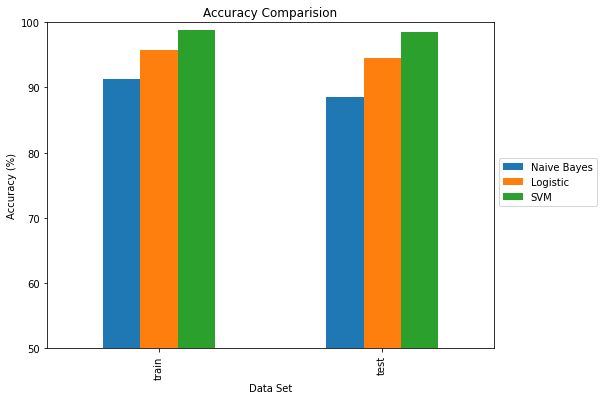

In [26]:
import matplotlib.pyplot as plt

accuracy = pd.DataFrame({"Naive Bayes": [acc_bayes_train*100, acc_bayes_test*100], "Logistic": [acc_log_train*100, acc_log_test*100], "SVM": [acc_svm_train*100, acc_svm_test*100]}, index = ["train", "test"])

plot1 = accuracy.plot(kind='bar', figsize=(8, 6), title="Accuracy Comparision", ylim=(50, 100))
plot1.set_xlabel("Data Set")
plot1.set_ylabel("Accuracy (%)")
plot1.legend(bbox_to_anchor=(1.0, 0.6))

我们可以看到，在这个二分类问题中，在拟合程度上，Naive Bayes、Logistic Regression、SVM的拟合程度依次提高；在测试准确率上，Naive Bayes、Logistic Regression、SVM的测试准确率依次提高。

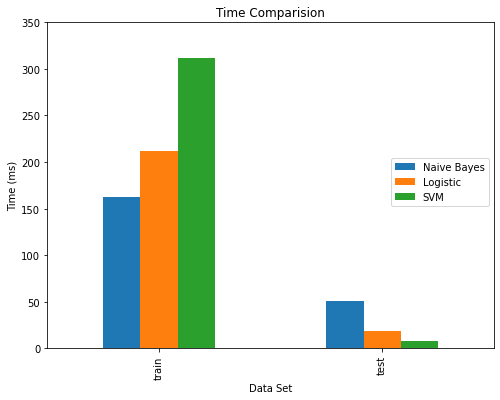

In [27]:
import matplotlib.pyplot as plt

accuracy = pd.DataFrame({"Naive Bayes": [time_span_bayes,time_span_bayes_t], "Logistic": [time_span_log, time_span_log_t], "SVM": [time_span_svm, time_span_svm_t]}, index = ["train", "test"])

plot1 = accuracy.plot(kind='bar', figsize=(8, 6), title="Time Comparision", ylim=(0, 350))
plot1.set_xlabel("Data Set")
plot1.set_ylabel("Time (ms)")
plot1.legend(bbox_to_anchor=(1.0, 0.6))

我们可以看到，在训练时间上，Naive Bayes与Logistic Regression相近，而SVM的训练时间要长许多；而测试时间上，Bayes、Logistic Regression、SVM 以此下降。

# Conclusion

在本次实现中，logistic regression采用了判断收敛并直接结束的实现方式，训练时间比常规时间偏多，而当遇到一些收敛较慢的情况时，则会比较慢。
总体上来说，Naive Bayes、Logistic Regression、SVM 的训练时间依次增加，模型拟合程度依次增加，测试准确率依次提高。
下对三种方法进行讨论：
Naive Bayes：模型训练时间较短，准确率一般，同时，由于对于连续变量和大数据采用了分段归类处理，实际分类效果会受到影响。适用于哑变量较多，变量较少的情况。
Logistic Regression：训练时间适中，准确率较高，但遇到收敛慢的情形可能会较慢。
SVM：训练时间最长，同时准确率也最高，是目前十分优秀的二分类方法，有着极高的准确率。缺点是训练时间长。